# Malus Exp.
$I=I_0 cos^{2}{\theta_i}$

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
malus_data = dict()
with open("./exp4_data/malus.txt", "r") as f:
    raw_data = f.read().split()
    for idx in range(0, len(raw_data), 2):
        angle, intensity = int(raw_data[idx]), -float(raw_data[idx+1])
        malus_data[angle] = intensity

In [3]:
def malus_fit(angle, coef):
    return coef*(np.cos(angle*np.pi/180)**2)

In [4]:
X, y = np.array(list(malus_data.keys())), np.array(list(malus_data.values()))
popt, pcov = curve_fit(malus_fit, X, y)
print(f"Exp. Coefficient : {malus_data[0]:.4f}")
print(f"Theoretical Coefficient : {popt[0]:.4f}")
print(f"Error Rate : {abs(popt[0]-malus_data[0])/popt[0]:.4f}")

Exp. Coefficient : 0.3438
Theoretical Coefficient : 0.4881
Error Rate : 0.2956


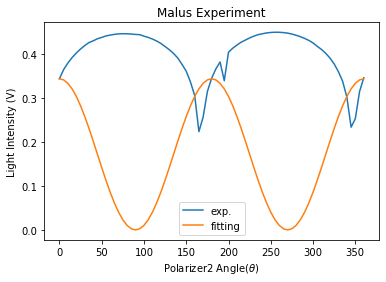

In [15]:
theo_data = [malus_data[0]*(np.cos((angle)*np.pi/180))**2 for angle in malus_data.keys()]

plt.plot(malus_data.keys(), malus_data.values())
plt.plot(malus_data.keys(), theo_data)
plt.xlabel("Polarizer2 Angle($\\theta$)")
plt.ylabel("Light Intensity (V)")
plt.title("Malus Experiment")
plt.legend(["exp.", "fitting"])
plt.show()

# 1/2 Polarizer

In [6]:
def get_data(path: str) -> dict:
    all_angle = dict()

    with open(path, "r") as f:
        N = int(f.readline())
        for idx in range(N):
            fix, polar1 = map(int, f.readline().split())
            polar2_intensity = []
            while True:
                angle, intensity = f.readline().split()
                angle = int(angle)
                intensity = float(intensity)
                polar2_intensity.append((angle, intensity))
                if angle == 180:
                    break
            all_angle[fix] = polar2_intensity
    return all_angle

In [7]:
half_angle = get_data("./exp4_data/half.txt")

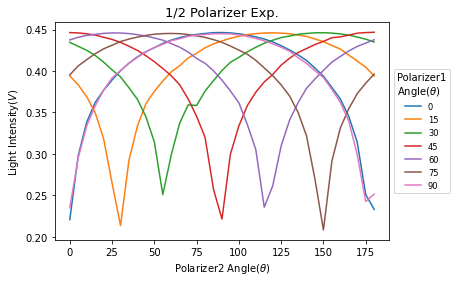

In [8]:
def get_exp_plot(angle_set: dict, title: str) -> None:
    for fixed_angle, values in angle_set.items():
        plt.plot([angle for angle, _ in values], [intensity for _, intensity in values])
    plt.title(title, fontsize=13)
    plt.xlabel("Polarizer2 Angle($\\theta$)")
    plt.ylabel("Light Intensity($V$)")
    plt.legend(angle_set.keys(), loc="center left", bbox_to_anchor=(1, 0.5), title="Polarizer1\nAngle($\\theta$)", fontsize="small")
    plt.show()
    
get_exp_plot(half_angle, "1/2 Polarizer Exp.")

# 1/4 Polarizer

In [9]:
quarter_angle = get_data("./exp4_data/quarter.txt")

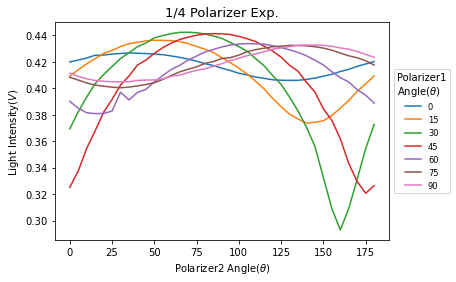

In [10]:
get_exp_plot(quarter_angle, title="1/4 Polarizer Exp.")

# Liquid Crystal - 1/2

In [11]:
lc_half = get_data("./exp4_data/lc-half.txt")

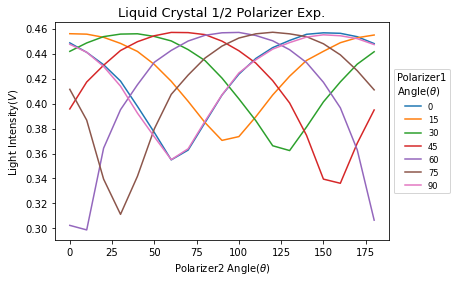

In [12]:
get_exp_plot(lc_half, title="Liquid Crystal 1/2 Polarizer Exp.")

# Liquid Crystal - 1/4

In [13]:
lc_quarter = get_data("./exp4_data/lc-quarter.txt")

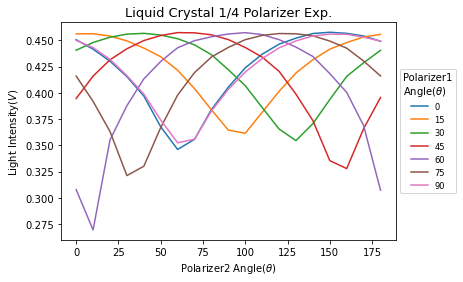

In [14]:
get_exp_plot(lc_quarter, title="Liquid Crystal 1/4 Polarizer Exp.")